In [1]:
from game import *
from policy import *
from simulator import *

c:\Users\zhufe\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Benchmark

In [2]:
Evaluator(policy=Benchmark()).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:02<00:00, 41260.58it/s]


-0.10579

# MC Bootstrap

In [3]:
mc_policy = Easy21Policy()
mc_simulator = MonteCarloSimulator(policy=mc_policy)
mc_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [01:35<00:00, 1042.82it/s]


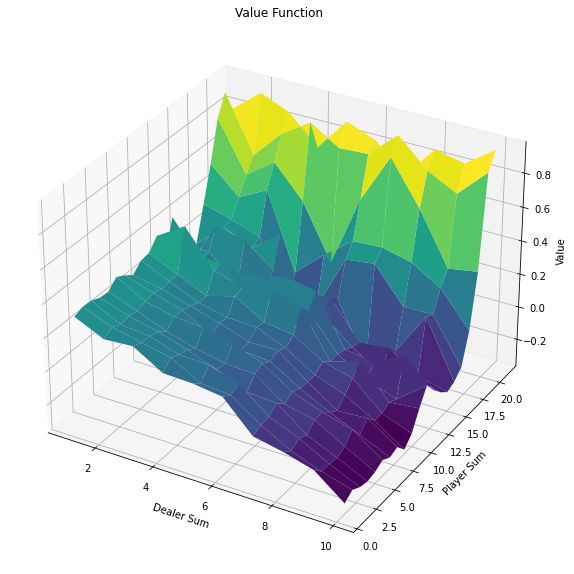

In [4]:
mc_policy.plot_value_function()

In [5]:
Evaluator(policy=mc_policy).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:04<00:00, 24137.47it/s]


0.05029

# SARSA Bootstrap

In [6]:
sarsa_policy = Easy21Policy()
sarsa_simulator = SARSALambdaSimulator(policy=sarsa_policy, lambda_=0.5)
sarsa_simulator.run(num_episodes=50000)

100%|██████████| 50000/50000 [00:03<00:00, 14918.53it/s]


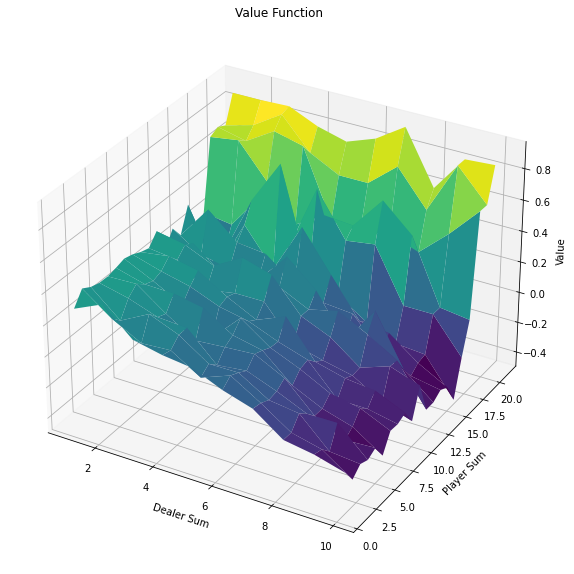

In [7]:
sarsa_policy.plot_value_function()

In [8]:
Evaluator(policy=sarsa_policy).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:04<00:00, 24238.33it/s]


0.05331

# Linear Approximation

In [9]:
approx_model = Easy21ActionValueApproximation()
approx_simulator = ApproximationSimulator(
    model=approx_model, lambda_=0.5, learning_rate=0.001
)
approx_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [00:36<00:00, 2736.24it/s]


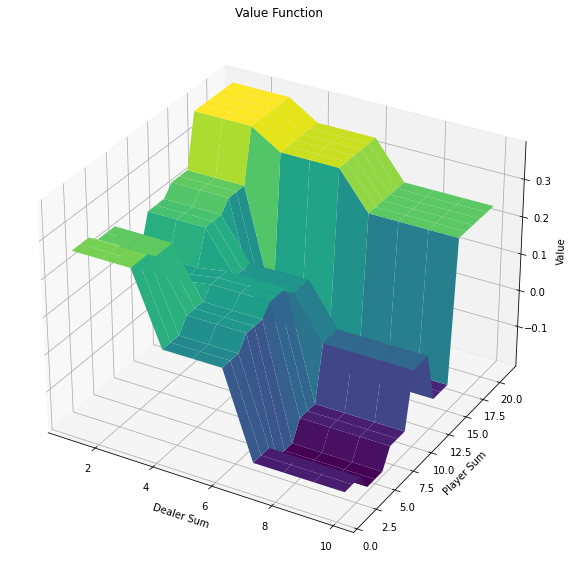

In [10]:
approx_model.plot_value_function()

In [11]:
Evaluator(policy=approx_model).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:14<00:00, 6874.98it/s]


0.04851

# REINFORCE

In [12]:
policy_approx_model = Easy21PolicyApproximation()
reinforce_simulator = REINFORCESimulator(model=policy_approx_model, learning_rate=0.01)
reinforce_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [02:14<00:00, 741.62it/s]


In [13]:
Evaluator(policy=policy_approx_model).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:09<00:00, 10340.88it/s]


0.04402

# Actor-Critic

In [14]:
actor_model = Easy21PolicyApproximation()
critic_model = Easy21ActionValueApproximation()
actor_critic_simulator = ActorCriticSimulator(
    actor_model=actor_model,
    critic_model=critic_model,
    lambda_=0.5,
    actor_learning_rate=0.01,
    critic_learning_rate=0.001,
)
actor_critic_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [00:57<00:00, 1729.45it/s]


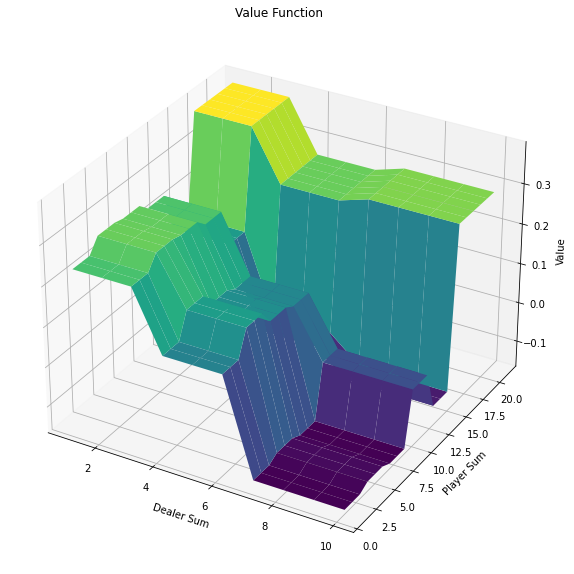

In [15]:
critic_model.plot_value_function()

In [18]:
Evaluator(policy=actor_model).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:11<00:00, 8842.85it/s]


0.02284

# Advantage

In [2]:
advantage_actor_model = Easy21PolicyApproximation()
advantage_critic_model = Easy21StateValueApproximation()
advantage_simulator = AdvantageSimulator(
    actor_model=advantage_actor_model,
    critic_model=advantage_critic_model,
    lambda_=0,
    actor_learning_rate=0.01,
    critic_learning_rate=0.01,
)
advantage_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [00:59<00:00, 1693.18it/s]


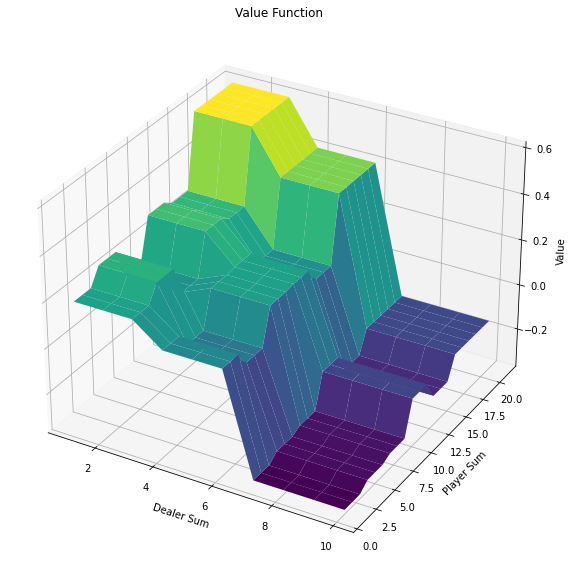

In [3]:
advantage_critic_model.plot_value_function()

In [4]:
Evaluator(policy=advantage_actor_model).evaluate(num_episodes=10000)

100%|██████████| 10000/10000 [00:00<00:00, 10912.97it/s]


0.053